<a href="https://colab.research.google.com/github/Non-NeutralZero/datascience-dev-helpers/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVC

In [0]:
#@title Imports [run the cell]
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

The objective of a Support Vector Classifier (SVC) is to divide data using a hyperplane


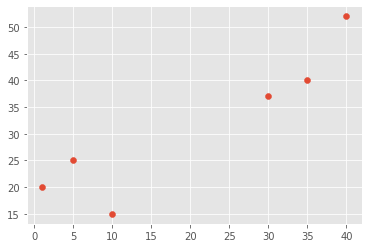

In [5]:
# let's try to divide some observations based on some two features
x = [1, 5, 30, 10, 35, 40]
y = [20, 25, 37, 15, 40, 52]
## First, let's see how the observations look in a 2D viz
plt.scatter(x,y)
plt.show()

In [6]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = np.array([0,1,0,1,0,1])
## C is decided using cross validation
clf = svm.SVC(kernel='linear', C = 1.0)
## fitting a linear classifier
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[0.1380943  0.24462418]


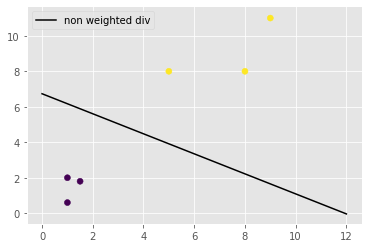

In [7]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

# Kernel Selection

In [0]:
#@title Section Imports
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn import metrics

In [0]:
data = load_breast_cancer()
X= pd.DataFrame(data.data, columns = data.feature_names)
y= pd.Series(data.target)

In [0]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, coef0=1))

models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

for title, clf in zip(titles, models):
    print("Accurary score for {0} is \n {1} on train \n".format(title, \
                                                metrics.accuracy_score(y, clf.predict(X)) 
                                                 ))

Accurary score for SVC with linear kernel is 
 0.9666080843585237 on train 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accurary score for LinearSVC (linear kernel) is 
 0.945518453427065 on train 

Accurary score for SVC with RBF kernel is 
 1.0 on train 

